In [1]:
%pip install numpy pandas matplotlib seaborn


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
train_df = pd.read_csv('train.csv')
# print(df.head())
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [3]:
# df.info()
print(f"Dataset Shape: {train_df.shape}")
train_df.isnull().sum()

Dataset Shape: (7613, 5)


id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

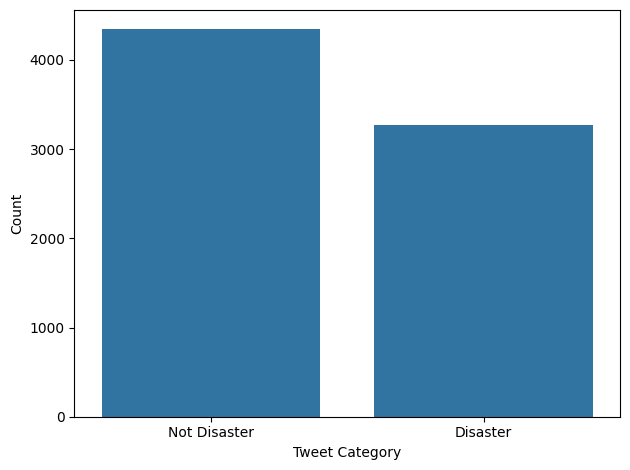

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize class distribution
sns.countplot(x='target', data=train_df)
plt.xlabel('Tweet Category')
plt.xticks([0, 1], ['Not Disaster', 'Disaster'])
plt.ylabel('Count')
plt.tight_layout()

In [10]:
# Analyze keywords
print(f"Number of unique keywords: {train_df['keyword'].nunique()}")
print(f"Percentage of tweets with keywords: {100 * (1 - train_df['keyword'].isna().mean()):.2f}%")

# Top 10 most common keywords
top_keywords = train_df['keyword'].value_counts().head(10)
print("\nTop 10 most common keywords:")
print(top_keywords)

Number of unique keywords: 221
Percentage of tweets with keywords: 99.20%

Top 10 most common keywords:
keyword
fatalities     45
deluge         42
armageddon     42
sinking        41
damage         41
harm           41
body%20bags    41
outbreak       40
evacuate       40
fear           40
Name: count, dtype: int64


In [12]:
# Top 10 most common locations
top_locations = train_df['location'].value_counts().head(10)
print(top_locations)

location
USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Name: count, dtype: int64


In [14]:
train_df['text_length'] = train_df['text'].str.len()
train_df['text_length']

0        69
1        38
2       133
3        65
4        88
       ... 
7608     83
7609    125
7610     65
7611    137
7612     94
Name: text_length, Length: 7613, dtype: int64

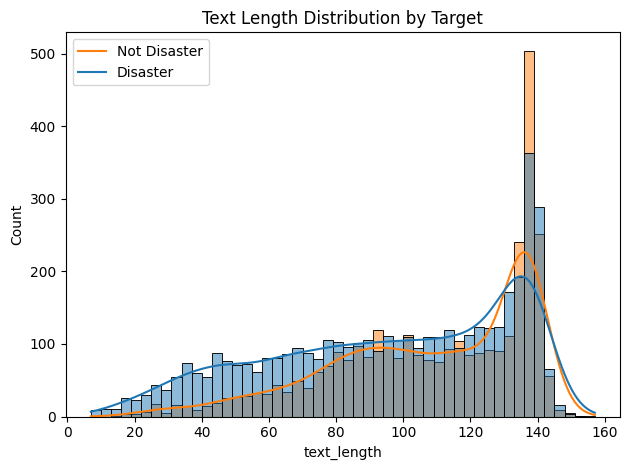

In [25]:
# Visualize text length distribution by target
sns.histplot(data=train_df, x='text_length', hue='target', kde=True, bins=50)
plt.title('Text Length Distribution by Target')
plt.ylabel('Count')
plt.legend(['Not Disaster', 'Disaster'])
plt.tight_layout()

### Correlation between Keywords and Target

In [33]:
#  keywords most associated with disasters
keyword_target = train_df.groupby('keyword')['target'].mean().sort_values(ascending=False)
print(keyword_target)

keyword
debris         1.000000
wreckage       1.000000
derailment     1.000000
outbreak       0.975000
oil%20spill    0.973684
                 ...   
body%20bag     0.030303
blazing        0.029412
ruin           0.027027
body%20bags    0.024390
aftershock     0.000000
Name: target, Length: 221, dtype: float64


# Visualize top keywords and their disaster association

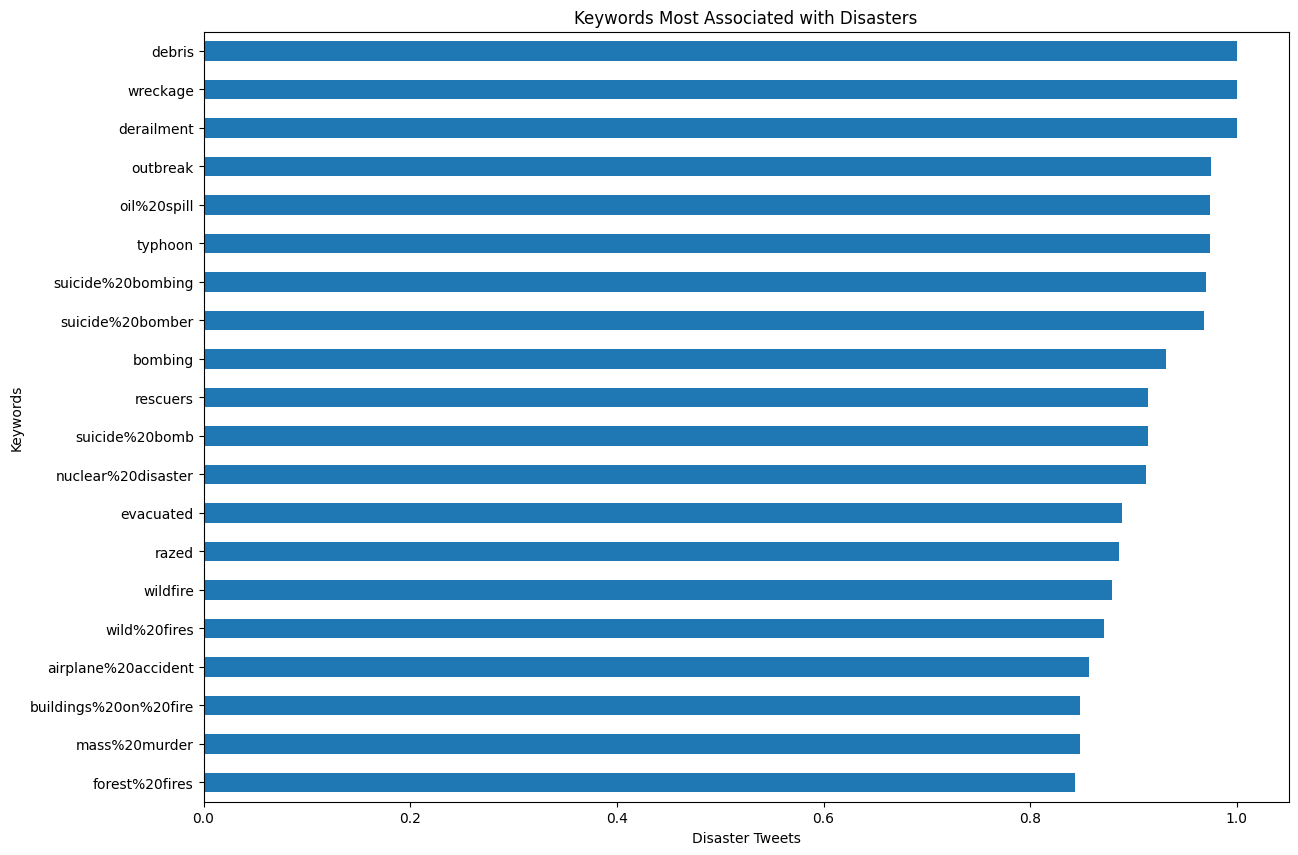

In [55]:
# Filter to keywords with at least 10 occurrences for more reliable results
keyword_counts = train_df['keyword'].value_counts()
common_keywords = keyword_counts[keyword_counts >= 10].index

# Filter keyword_target to include only common keywords
common_keyword_target = keyword_target[keyword_target.index.isin(common_keywords)]

# Plot top 20 most and least disaster-related common keywords
plt.figure(figsize=(14, 10))

common_keyword_target.head(20).sort_values().plot(kind='barh')
plt.title('Keywords Most Associated with Disasters')
plt.xlabel('Disaster Tweets')
plt.ylabel('Keywords')
plt.show()


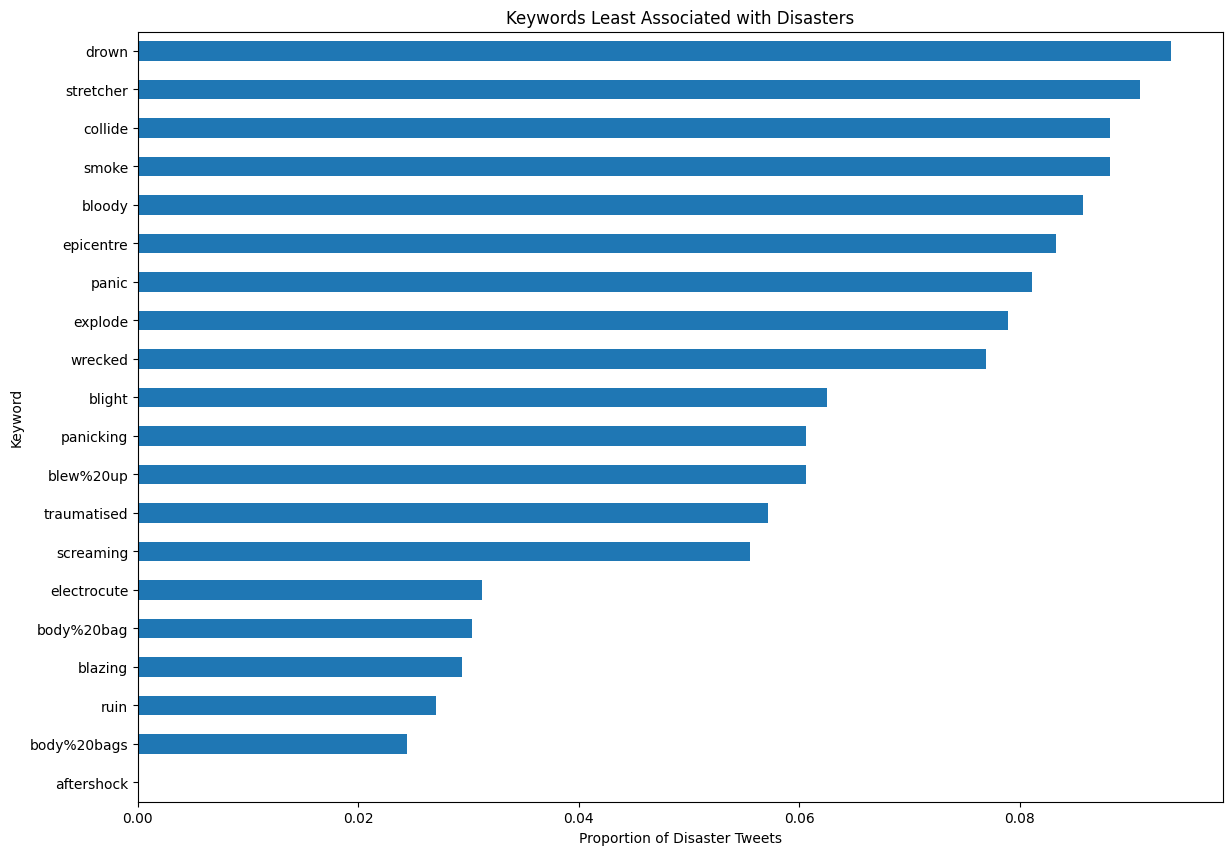

In [50]:
plt.figure(figsize=(14, 10))
common_keyword_target.tail(20).sort_values().plot(kind='barh')
plt.title('Keywords Least Associated with Disasters')
plt.xlabel('Disaster Tweets')
plt.ylabel('Keywords')

plt.show()